In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
california_housing = fetch_california_housing(as_frame=True)

In [9]:
df = california_housing.frame

In [16]:
df.columns = df.columns.str.lower().str.replace(' ','_')

Yukarıda tüm başlıkları küçülttüm.

In [20]:
df.isnull().sum()

medinc         0
houseage       0
averooms       0
avebedrms      0
population     0
aveoccup       0
latitude       0
longitude      0
medhouseval    0
dtype: int64

datada hiç NaN yok bu güzel bişey.

<Axes: xlabel='medhouseval', ylabel='Count'>

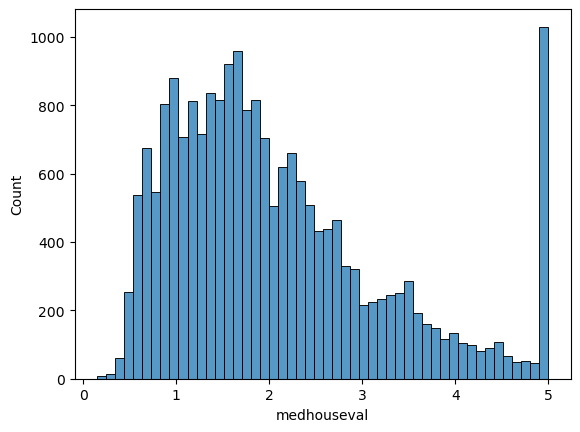

In [21]:
sns.histplot(df.medhouseval, bins=50)

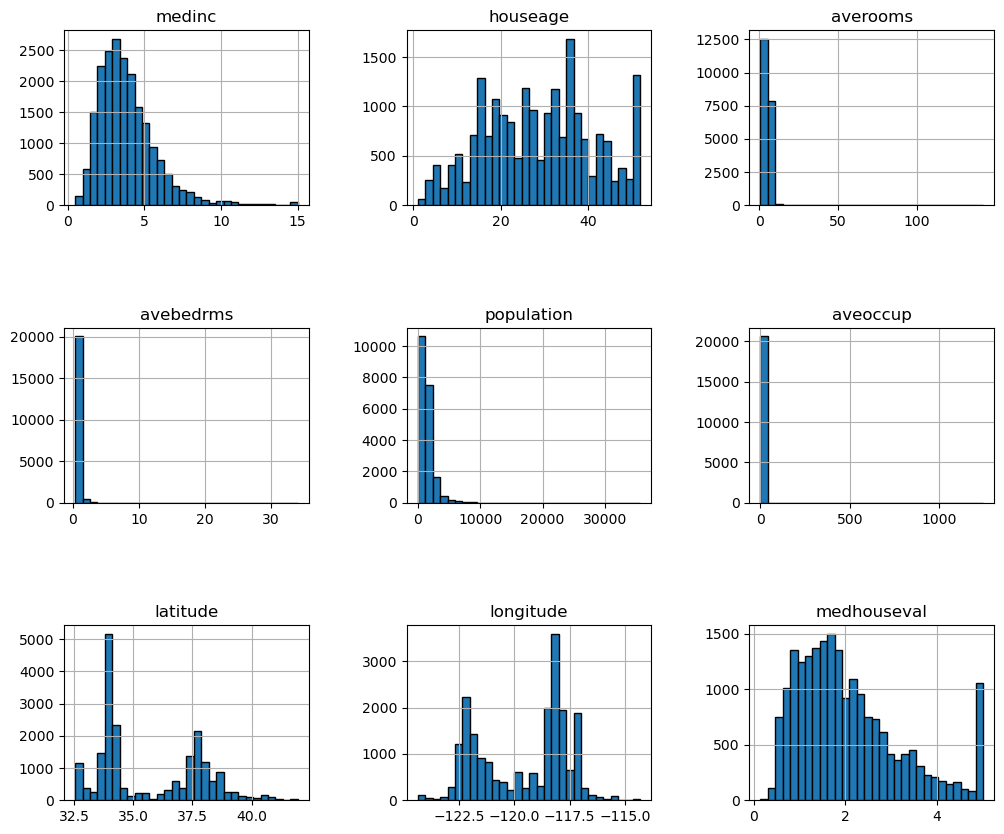

In [22]:
california_housing.frame.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

hmmm bu grafiklere bakıldığında gerekli girişleri verdiğimizde acaba yaklaşık değeri ne olacaktır sorusunun cevabını bulabiliriz.

In [23]:
n = len(df)
n

20640

In [24]:
idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)

,medinc,houseage,averooms,avebedrms,population,aveoccup,latitude,longitude,medhouseval
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [26]:
n_val = int( n * 0.2)
n_test = int (n * 0.2)
n_train = n - n_val - n_test
print( n_val, n_test, n_train)
df_val = df.iloc[:n_val]
df_test = df.iloc[n_val: n_val + n_test]
df_train = df.iloc[n_val+n_test : ]

4128 4128 12384


In [27]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [50]:
y_train = df_train.medhouseval.values
y_val = df_val.medhouseval.values
y_test = df_test.medhouseval.values

In [51]:
del df_train['medhouseval']
del df_val['medhouseval']
del df_test['medhouseval']

## Baseline Model


In [52]:
df_train.columns

Index(['medinc', 'houseage', 'averooms', 'avebedrms', 'population', 'aveoccup',
       'latitude', 'longitude'],
      dtype='object')

unutma df'lerde y değerlerimde henüz çıkartılmadı...

In [87]:
base = ['medinc', 'houseage', 'averooms', 'avebedrms', 'population', 'aveoccup',
       'latitude', 'longitude']

base = ['latitude', 'longitude']

In [88]:
df[base]

,medinc,houseage,averooms,avebedrms,population,aveoccup,latitude,longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [89]:
def train_linear_regression(X,y,r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX = XTX + r* np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:] 

In [90]:
def prepare_X(df):
    df_num = df[base]
    X = df_num.values
    return X

In [91]:
X_train = prepare_X(df_train)

In [125]:
w0, w = train_linear_regression(X_train, y_train, r = 0.001)

In [126]:
w0

-40.8980699579272

In [127]:
w

array([ 4.24245851e-01,  1.24241247e-02, -9.40722837e-02,  6.71903914e-01,
       -1.56335912e-05, -3.39443424e-03, -4.34953260e-01, -4.71040252e-01])

In [128]:
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

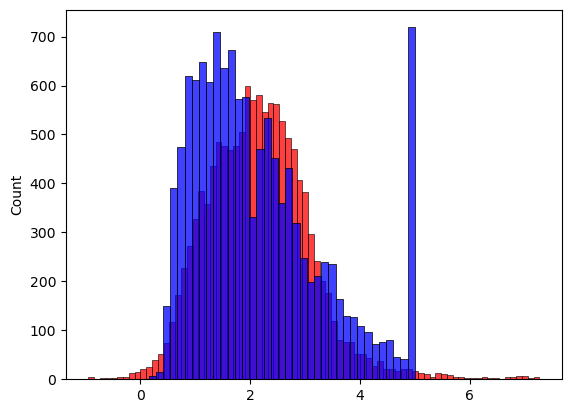

In [129]:
sns.histplot(y_pred, color='red')
sns.histplot(y_train, color = 'blue')

In [130]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [131]:
rmse(y_train, y_pred)

0.7227068638793539

## Validation


In [132]:
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.6939370103682068

<Axes: ylabel='Count'>

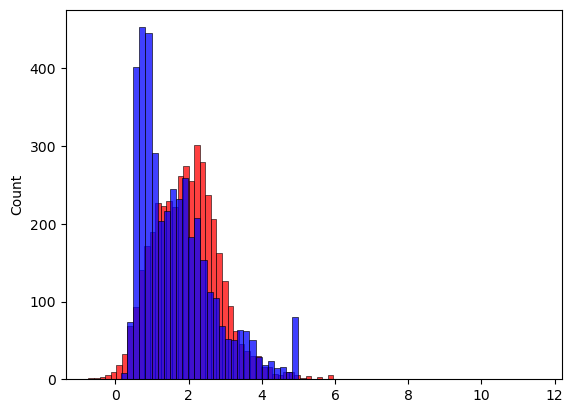

In [134]:
sns.histplot(y_pred, color='red')
sns.histplot(y_val, color = 'blue')

In [135]:
for r in [0.0, 0.1, 0.01, 0.001,0.00001, 10, 1000, 100000, 0.0001, 0.00001]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression(X_train, y_train, r= r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val,y_pred)
    print (r, w0, score)

0.0 -40.9467189410922 0.6940261871480333
0.1 -36.59390229082726 0.6870229365008014
0.01 -40.465377004750344 0.6931545999985047
0.001 -40.8980699579272 0.6939370103682068
1e-05 -40.946231878189 0.6940252931183416
10 -3.1815145860153105 0.7011494636895902
1000 -0.036302084697795264 0.716096745233584
100000 -0.0001110562297460498 0.9671646064509872
0.0001 -40.94184883447905 0.6940172489323493
1e-05 -40.946231878189 0.6940252931183416


## Testing

In [136]:

X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train, r= 0.1)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

score = rmse(y_val,y_pred)
print (r, w0, score)

1e-05 -36.59390229082726 0.6870229365008014


<Axes: ylabel='Count'>

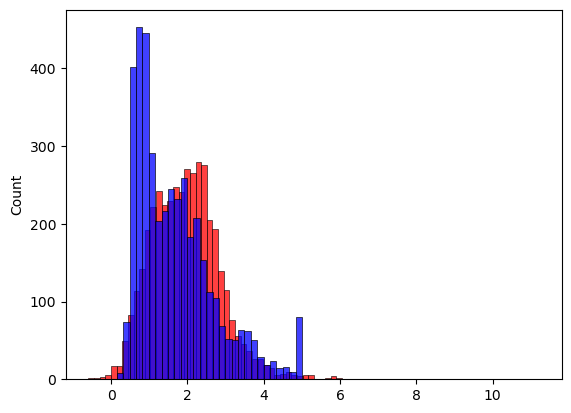

In [137]:
sns.histplot(y_pred, color='red')
sns.histplot(y_val, color = 'blue')

In [138]:
df_full_train = pd.concat([df_train, df_val ])

In [139]:
df_full_train = df_full_train.reset_index(drop= True)

In [140]:
X_full_train = prepare_X(df_full_train)


In [141]:
y_full_train = np.concatenate([y_train, y_val])

In [142]:
w0, w = train_linear_regression(X_full_train, y_full_train, r= 0.1)


In [143]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)

score = rmse(y_test,y_pred)
print (w0, score)

-33.97982128548726 0.7887277323385622


<Axes: ylabel='Count'>

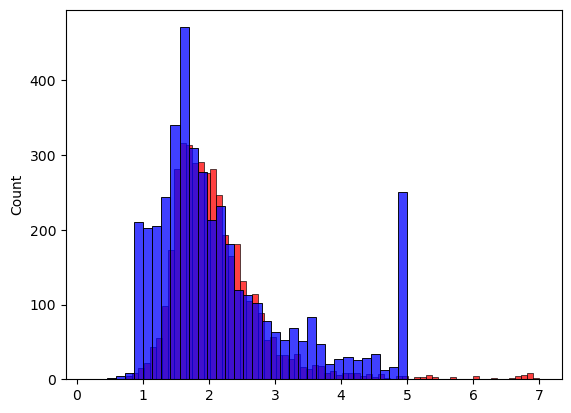

In [144]:
sns.histplot(y_pred, color='red')
sns.histplot(y_test, color = 'blue')

## Last check!!!

In [145]:
house = df_test.iloc[20].to_dict()
house

{'medinc': 3.3326,
 'houseage': 52.0,
 'averooms': 3.8916256157635467,
 'avebedrms': 1.0492610837438423,
 'population': 1462.0,
 'aveoccup': 3.600985221674877,
 'latitude': 34.12,
 'longitude': -118.2}

In [146]:
df_small = pd.DataFrame([house])
df_small

,medinc,houseage,averooms,avebedrms,population,aveoccup,latitude,longitude
0,3.3326,52.0,3.891626,1.049261,1462.0,3.600985,34.12,-118.2


In [147]:
X_small = prepare_X(df_small)


In [148]:
y_pred = w0 + X_small.dot(w)
y_pred

array([2.21573947])

In [152]:
aaa = y_test[20]

Bitmiştir.